In [85]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_squared_error,classification_report,accuracy_score
%matplotlib inline

In [25]:
#Read data

df = pd.read_csv('Fraud_check (1).csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [26]:
#Finding null values
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [27]:
#Print number of duplicate values
df.duplicated().sum()

0

In [28]:
#describe the data
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


# Visualization

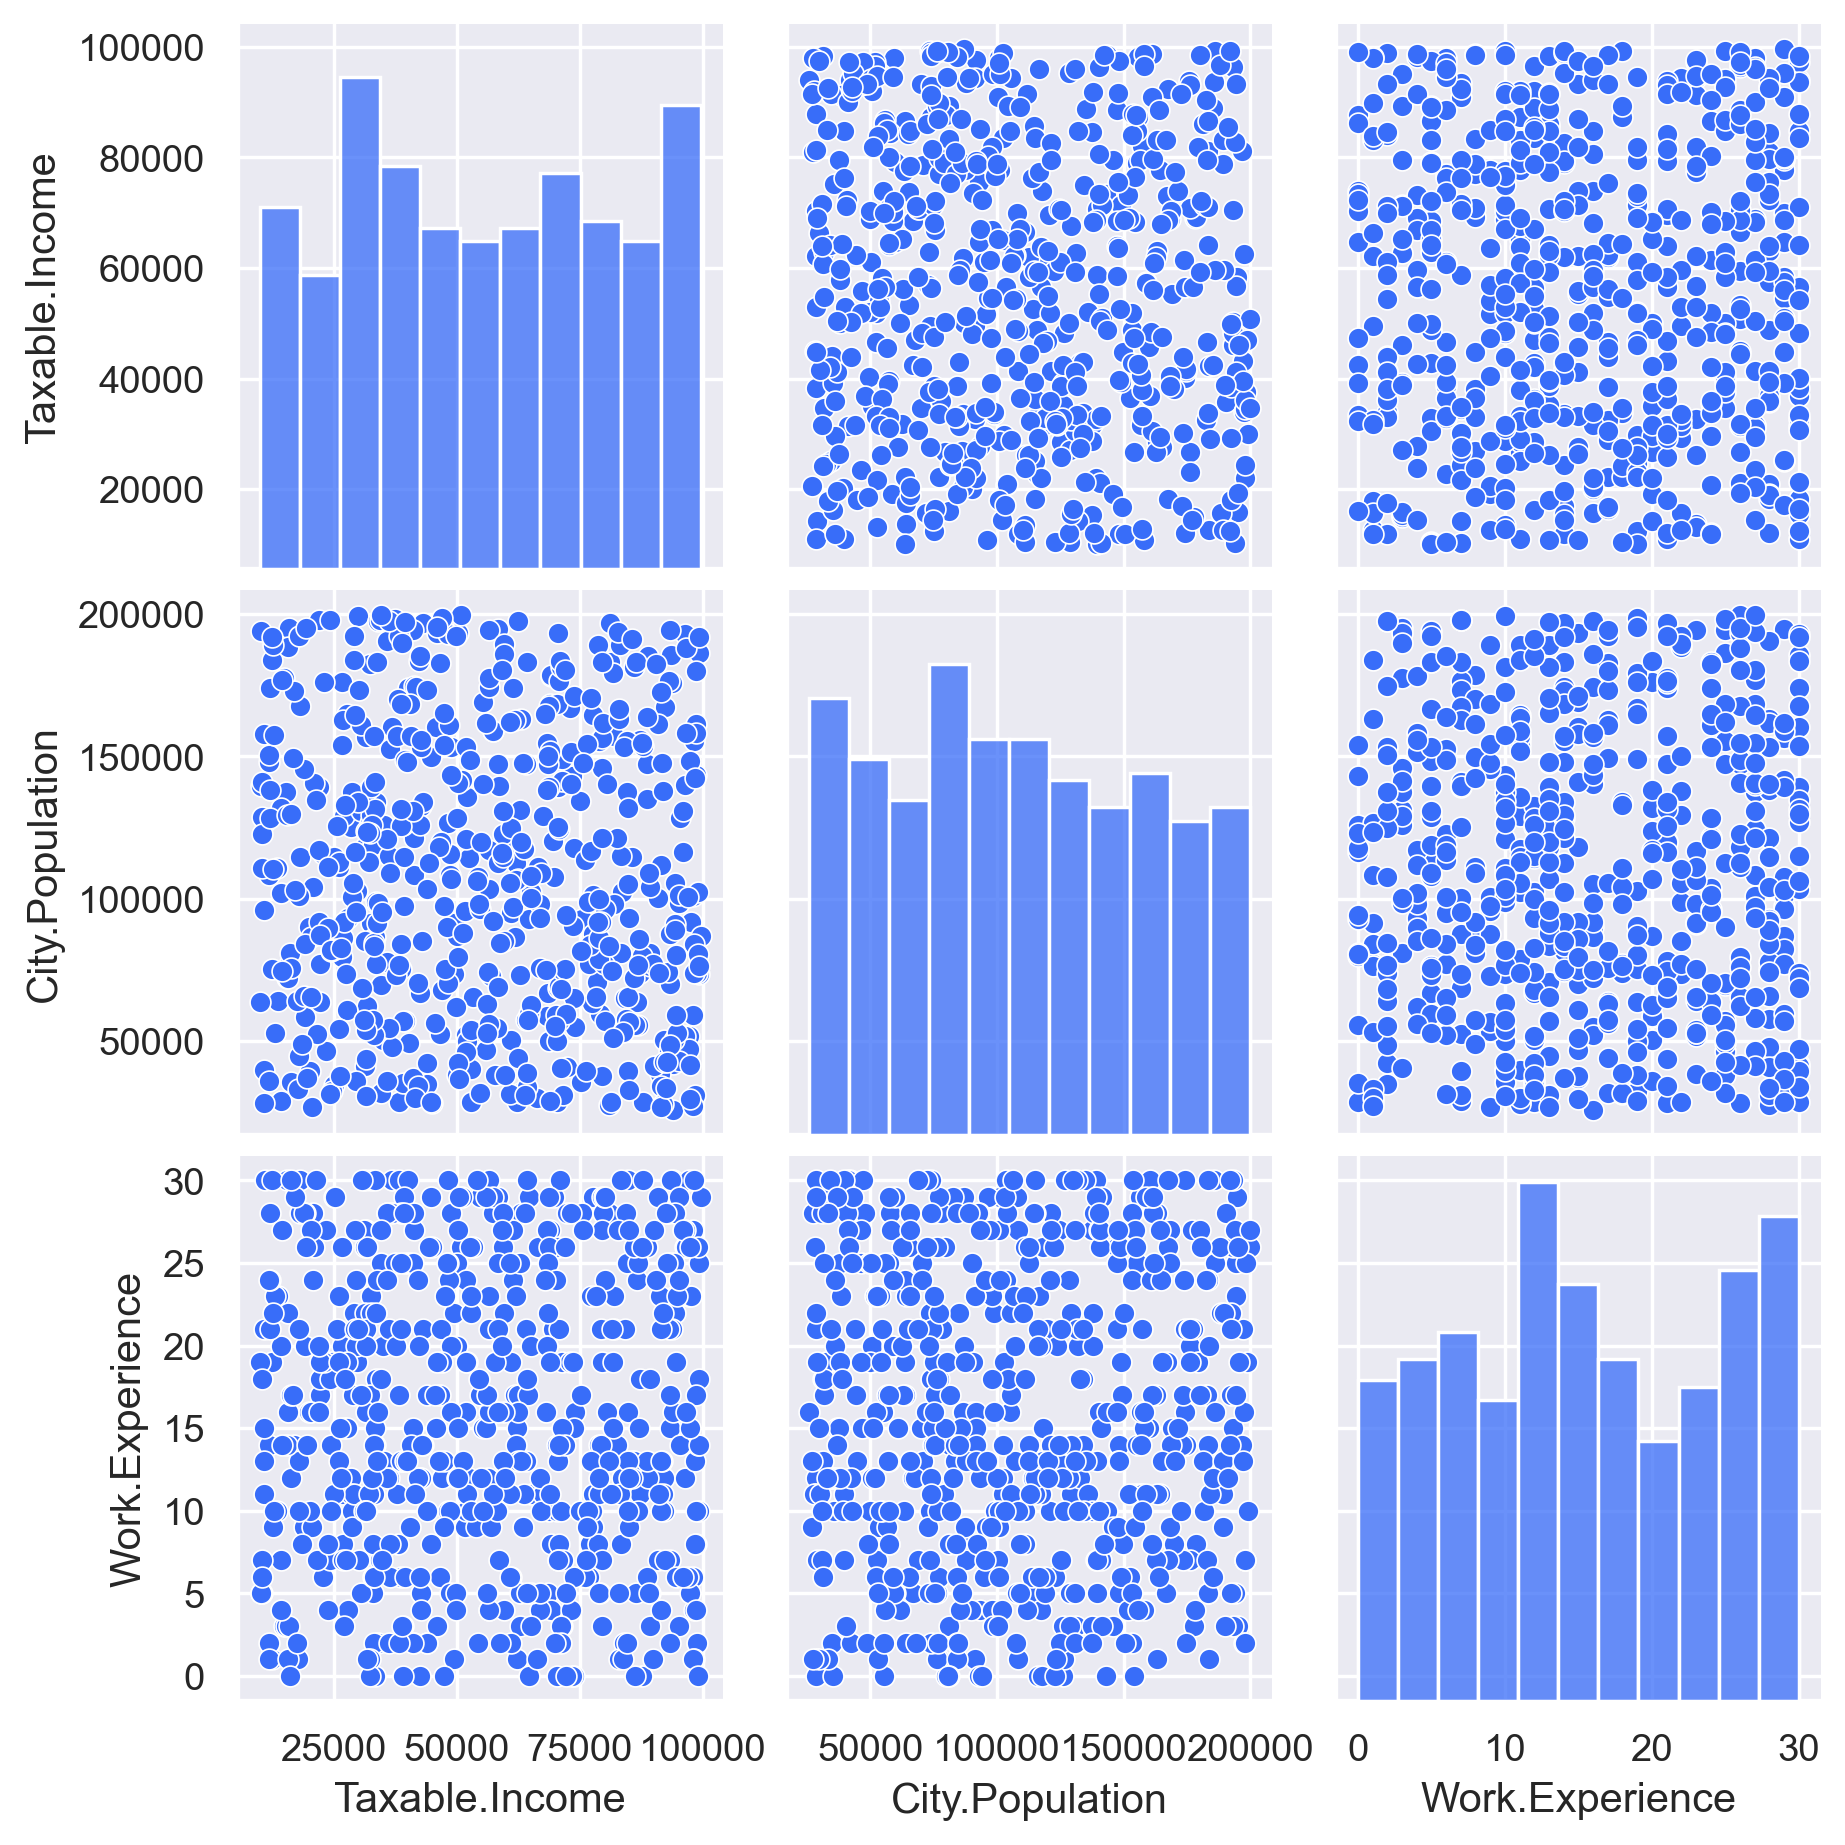

In [35]:
sns.pairplot(df)

<AxesSubplot:xlabel='Work.Experience', ylabel='Taxable.Income'>

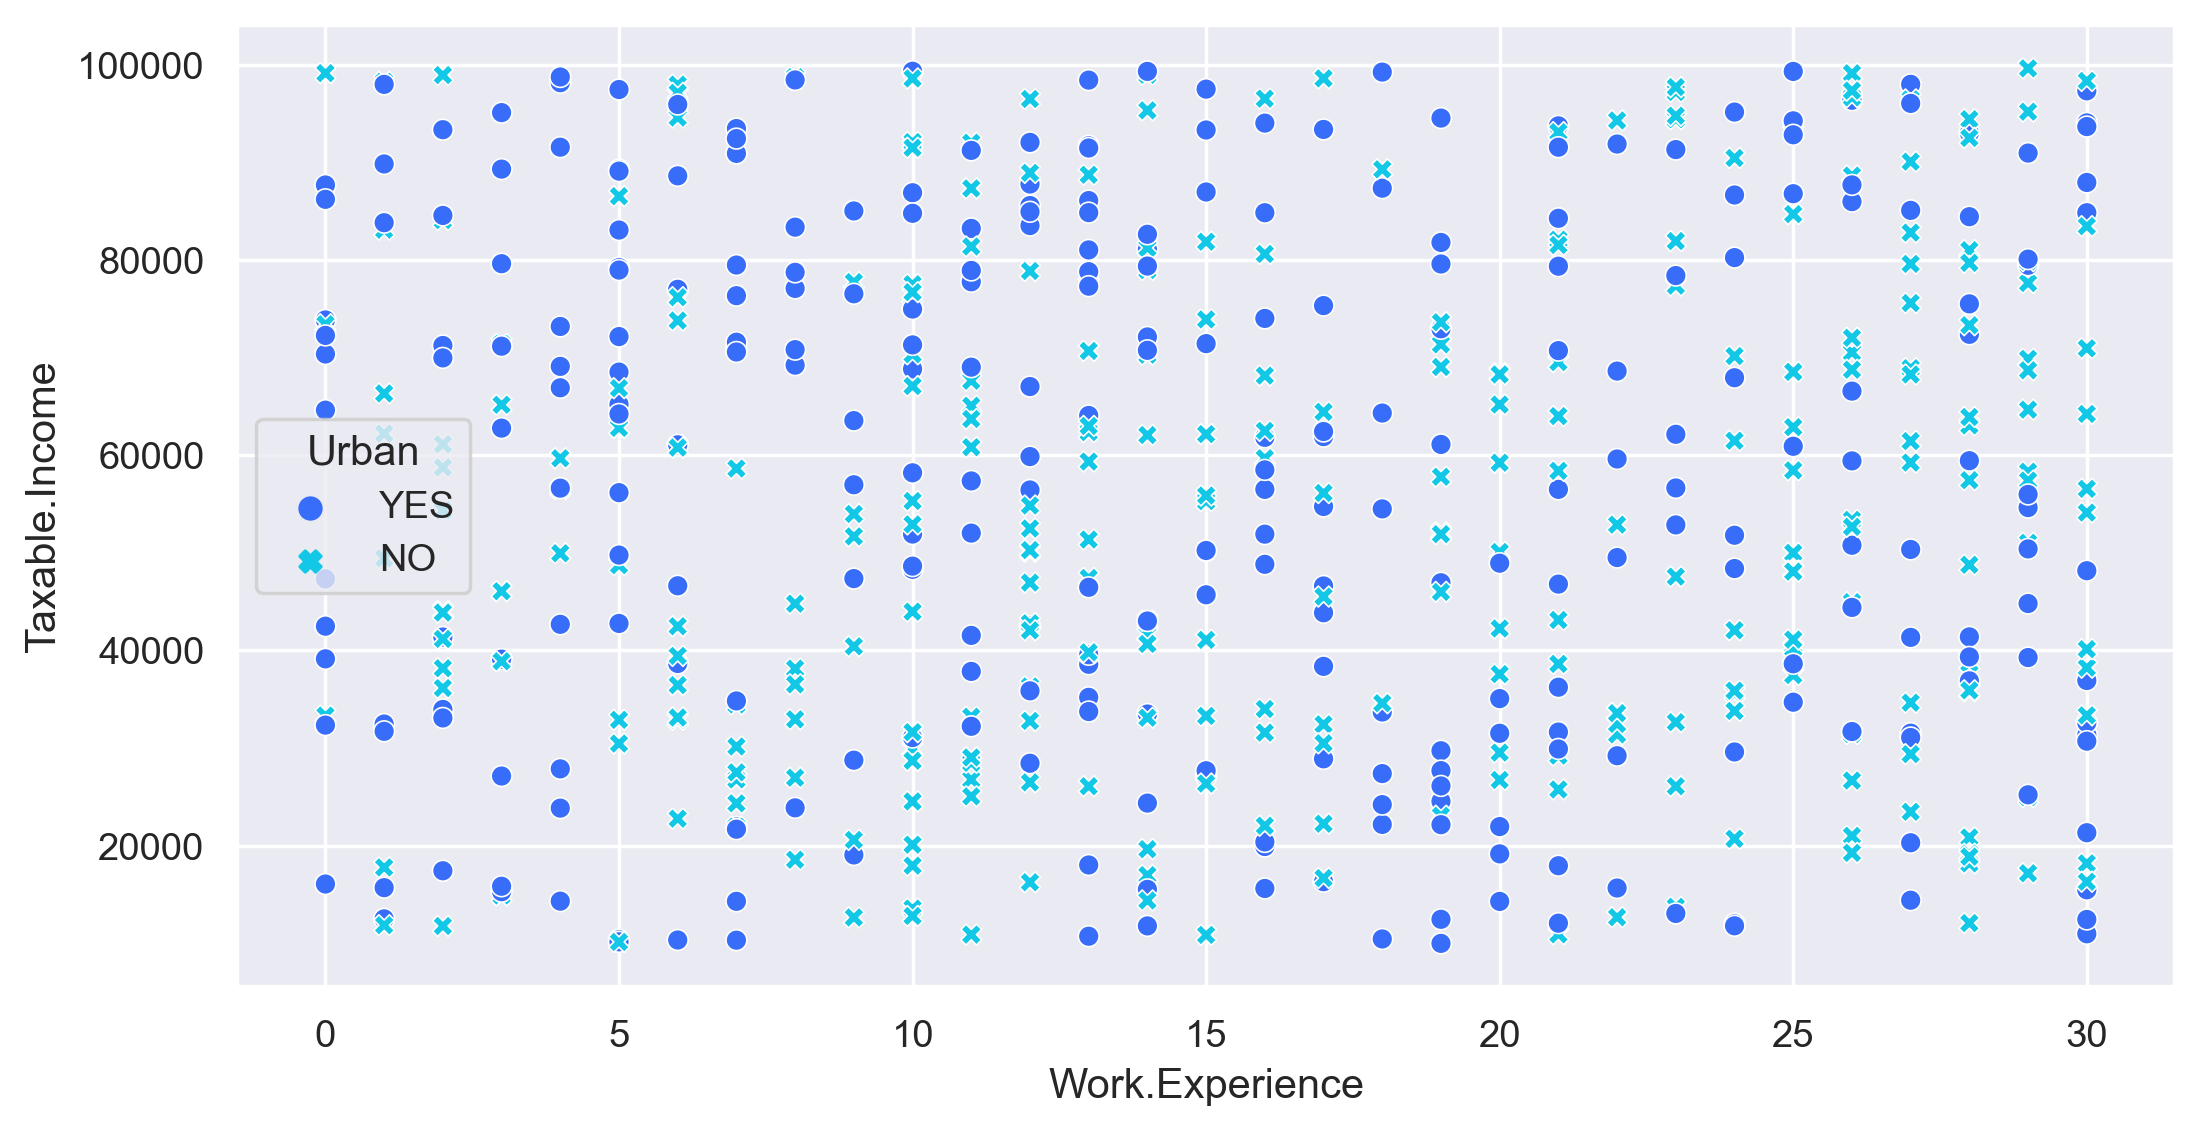

In [36]:
#Using scatterplot
sns.scatterplot(x=df['Work.Experience'], y=df['Taxable.Income'],hue='Urban', data=df,style='Urban')

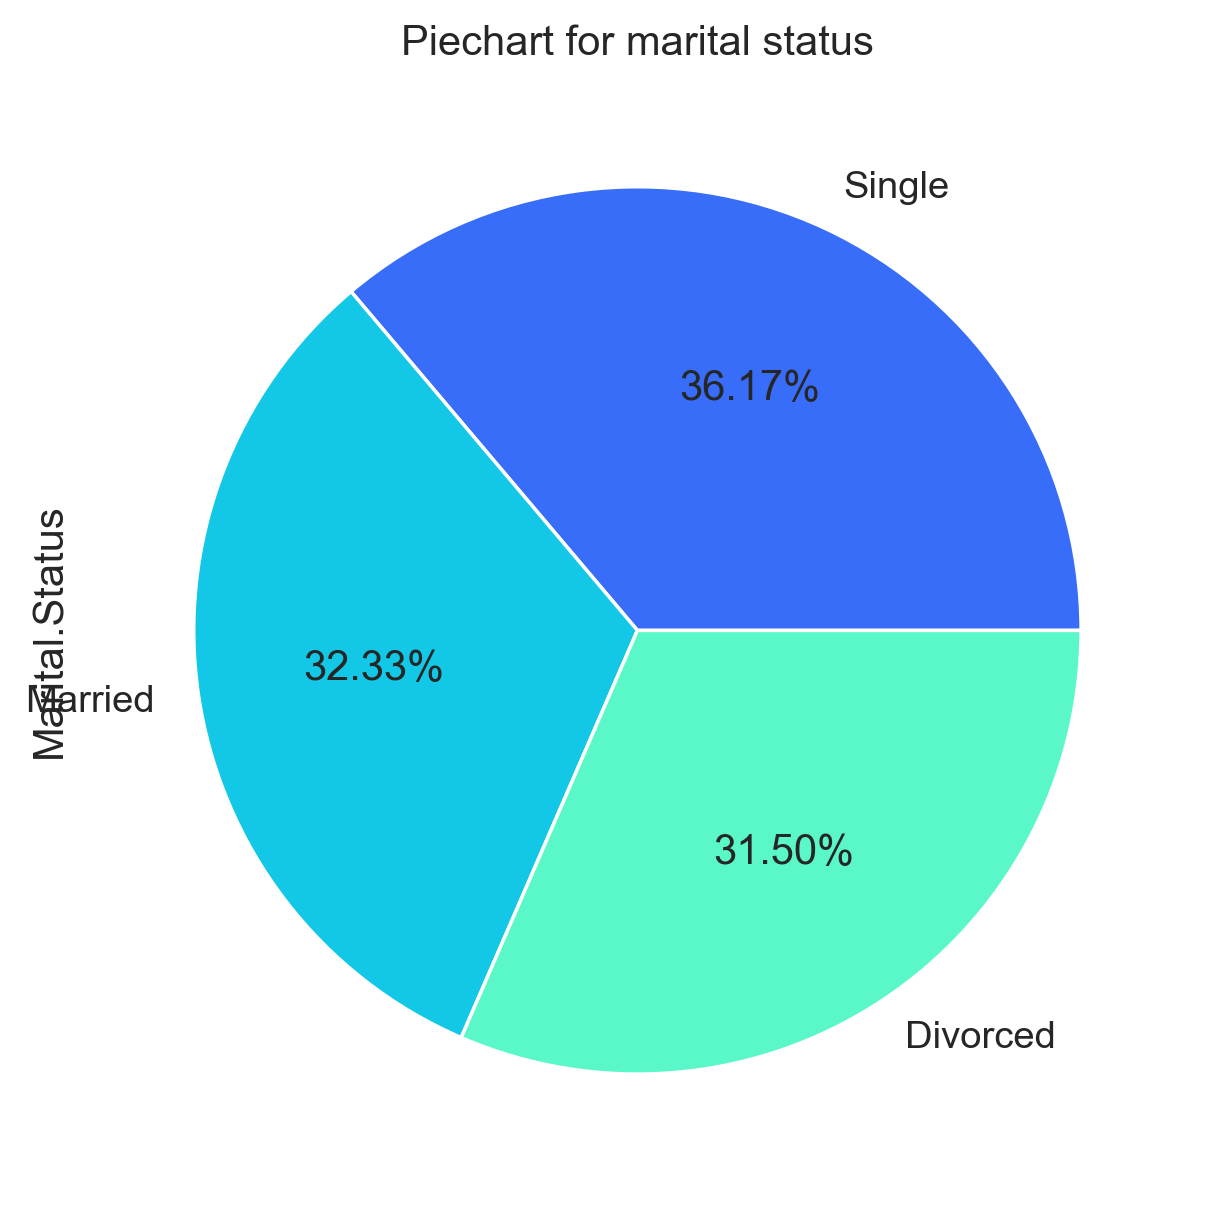

In [37]:
#using Piechart
df['Marital.Status'].value_counts().plot(kind='pie', autopct='%0.2f%%')
plt.title('Piechart for marital status')
plt.tight_layout()

<AxesSubplot:xlabel='Urban', ylabel='count'>

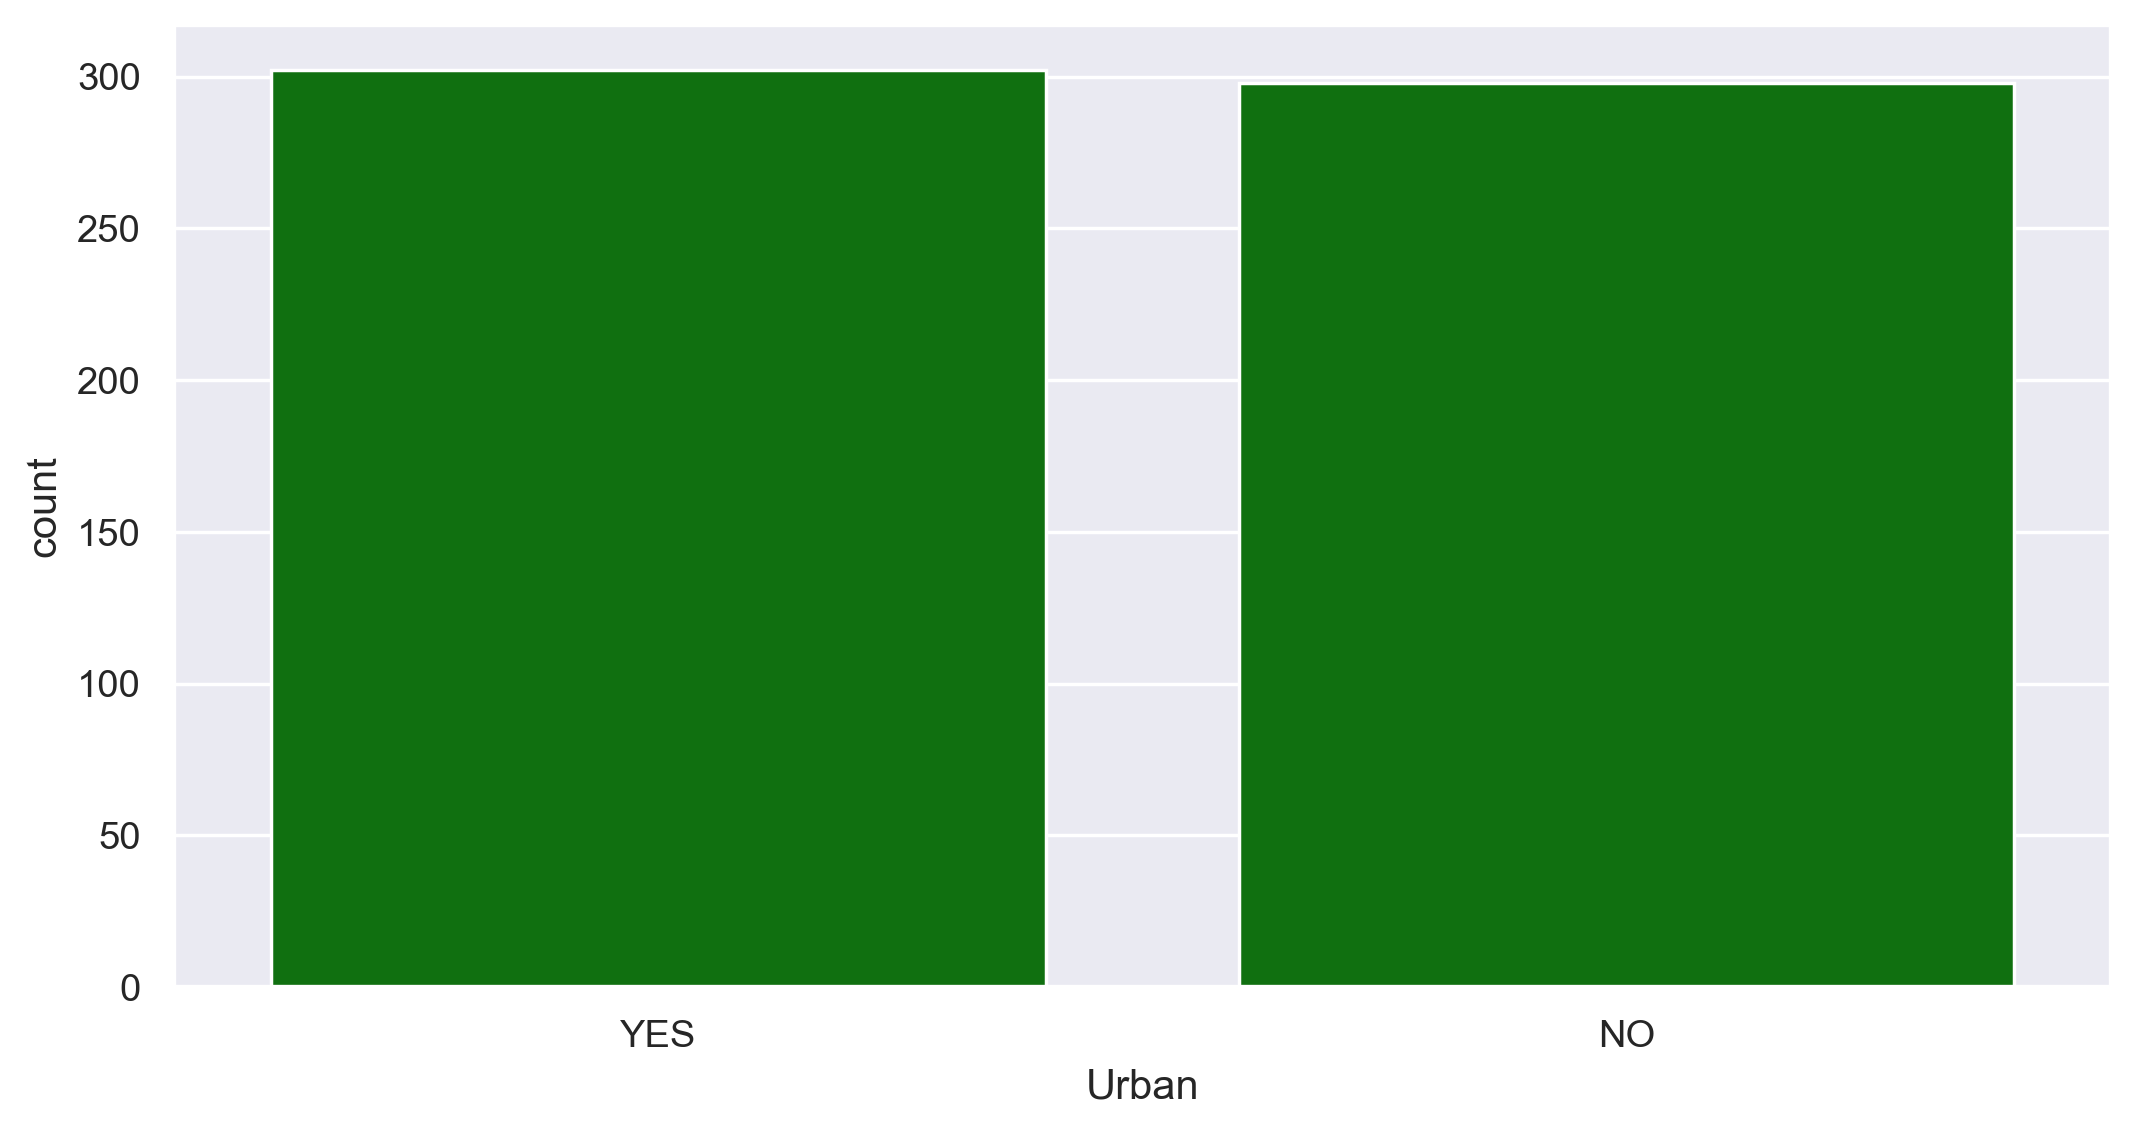

In [38]:
sns.countplot(df['Urban'],color='Green')

<AxesSubplot:ylabel='Count'>

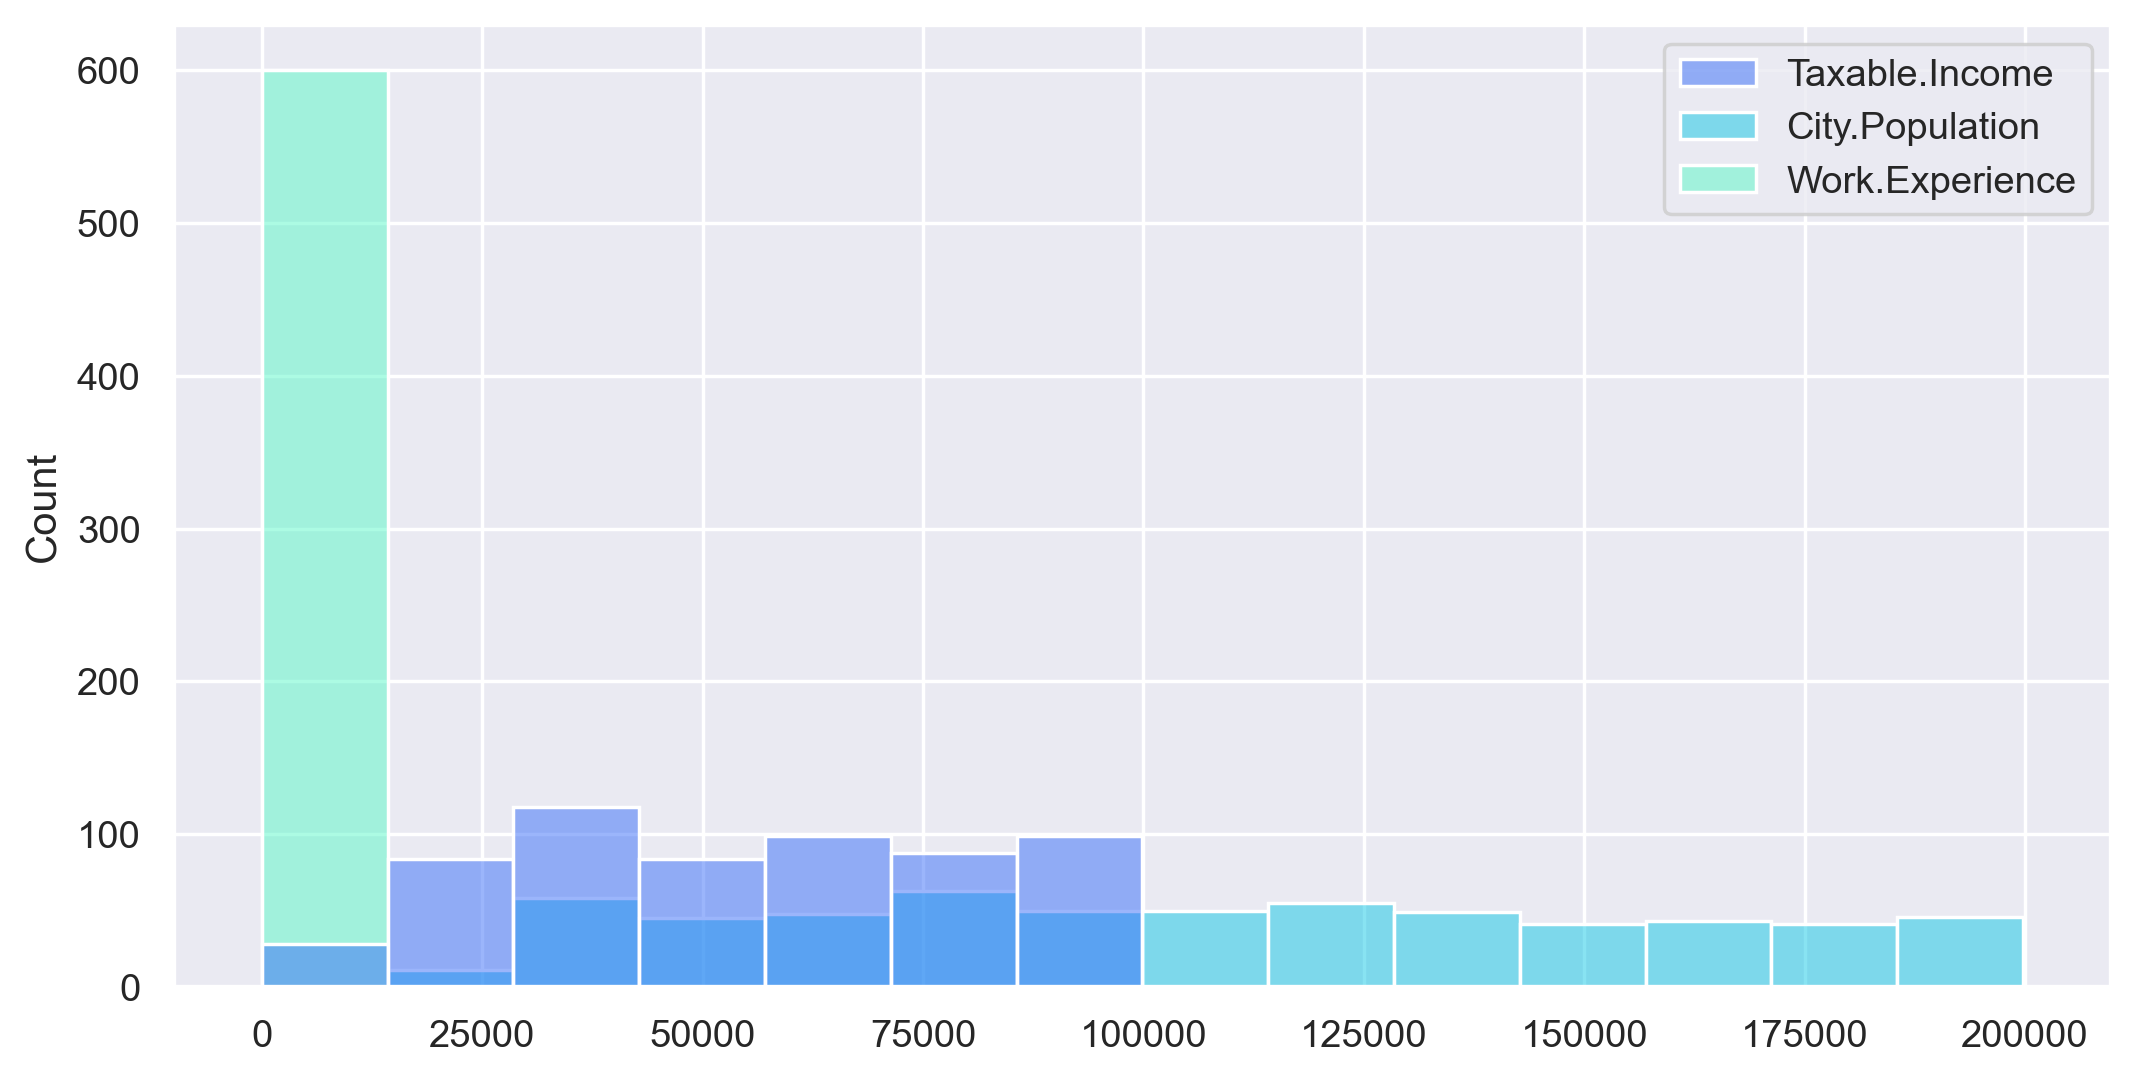

In [39]:
sns.histplot(df)

In [40]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


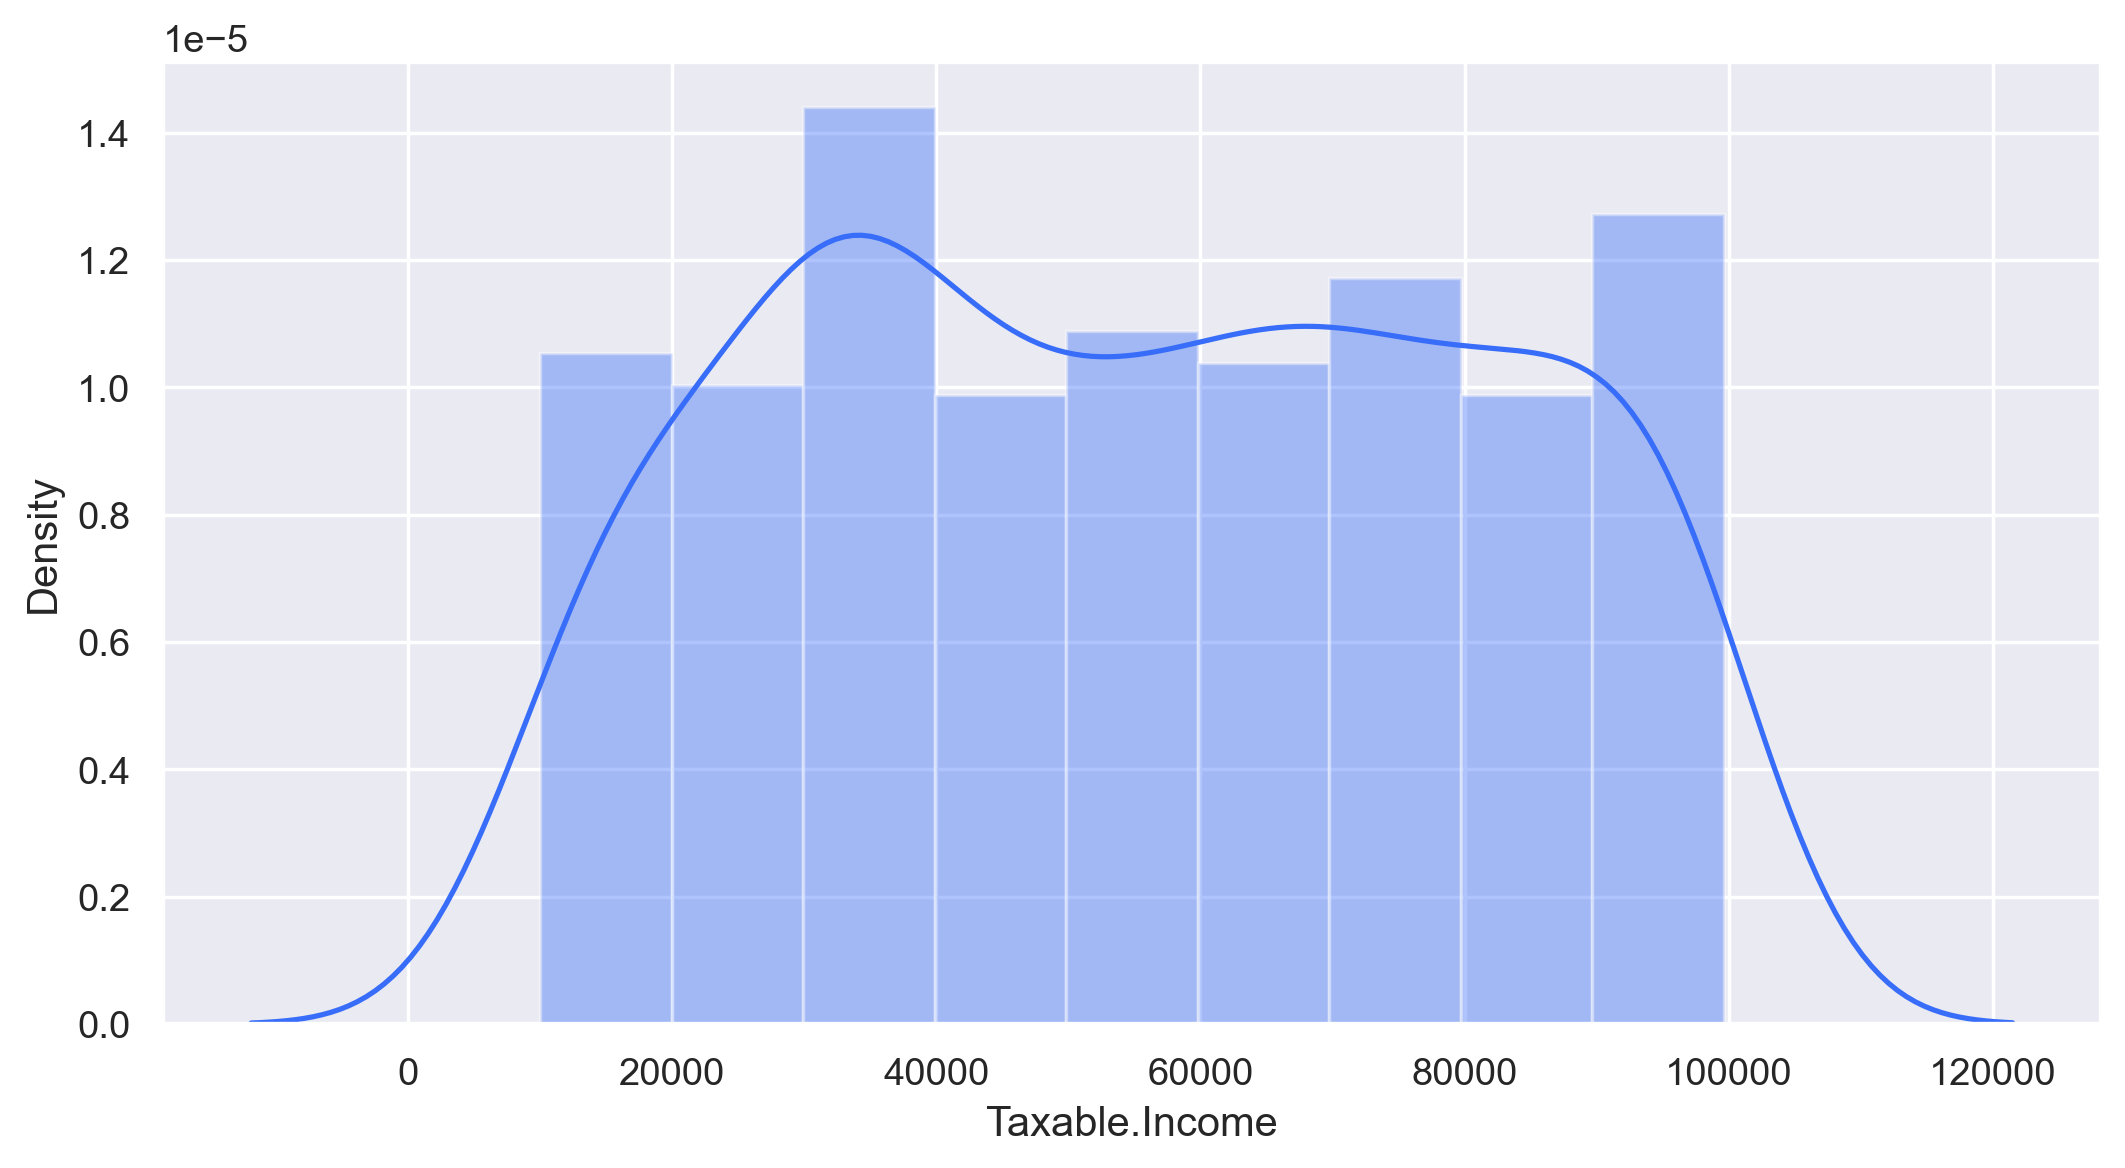

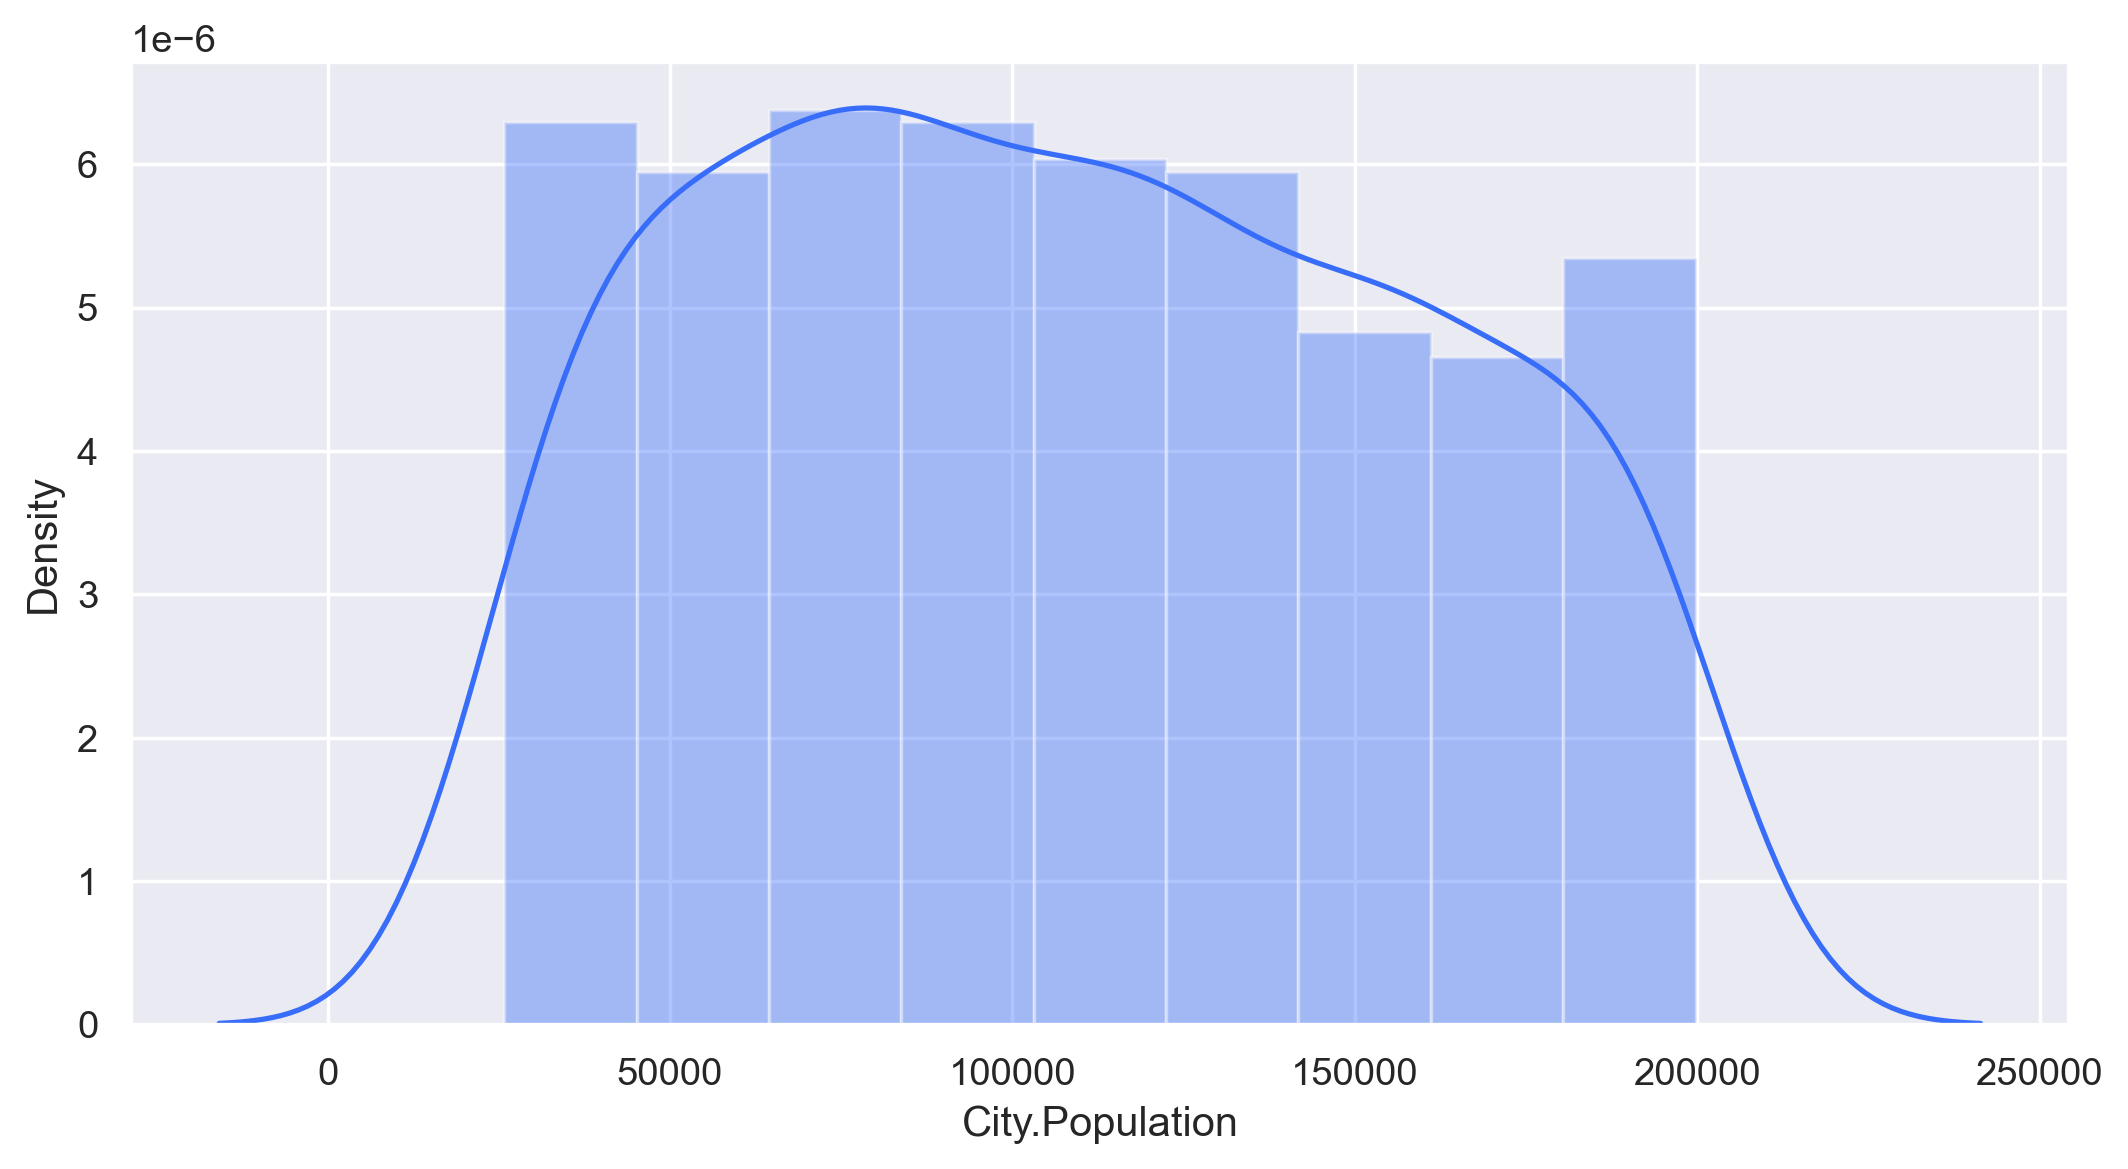

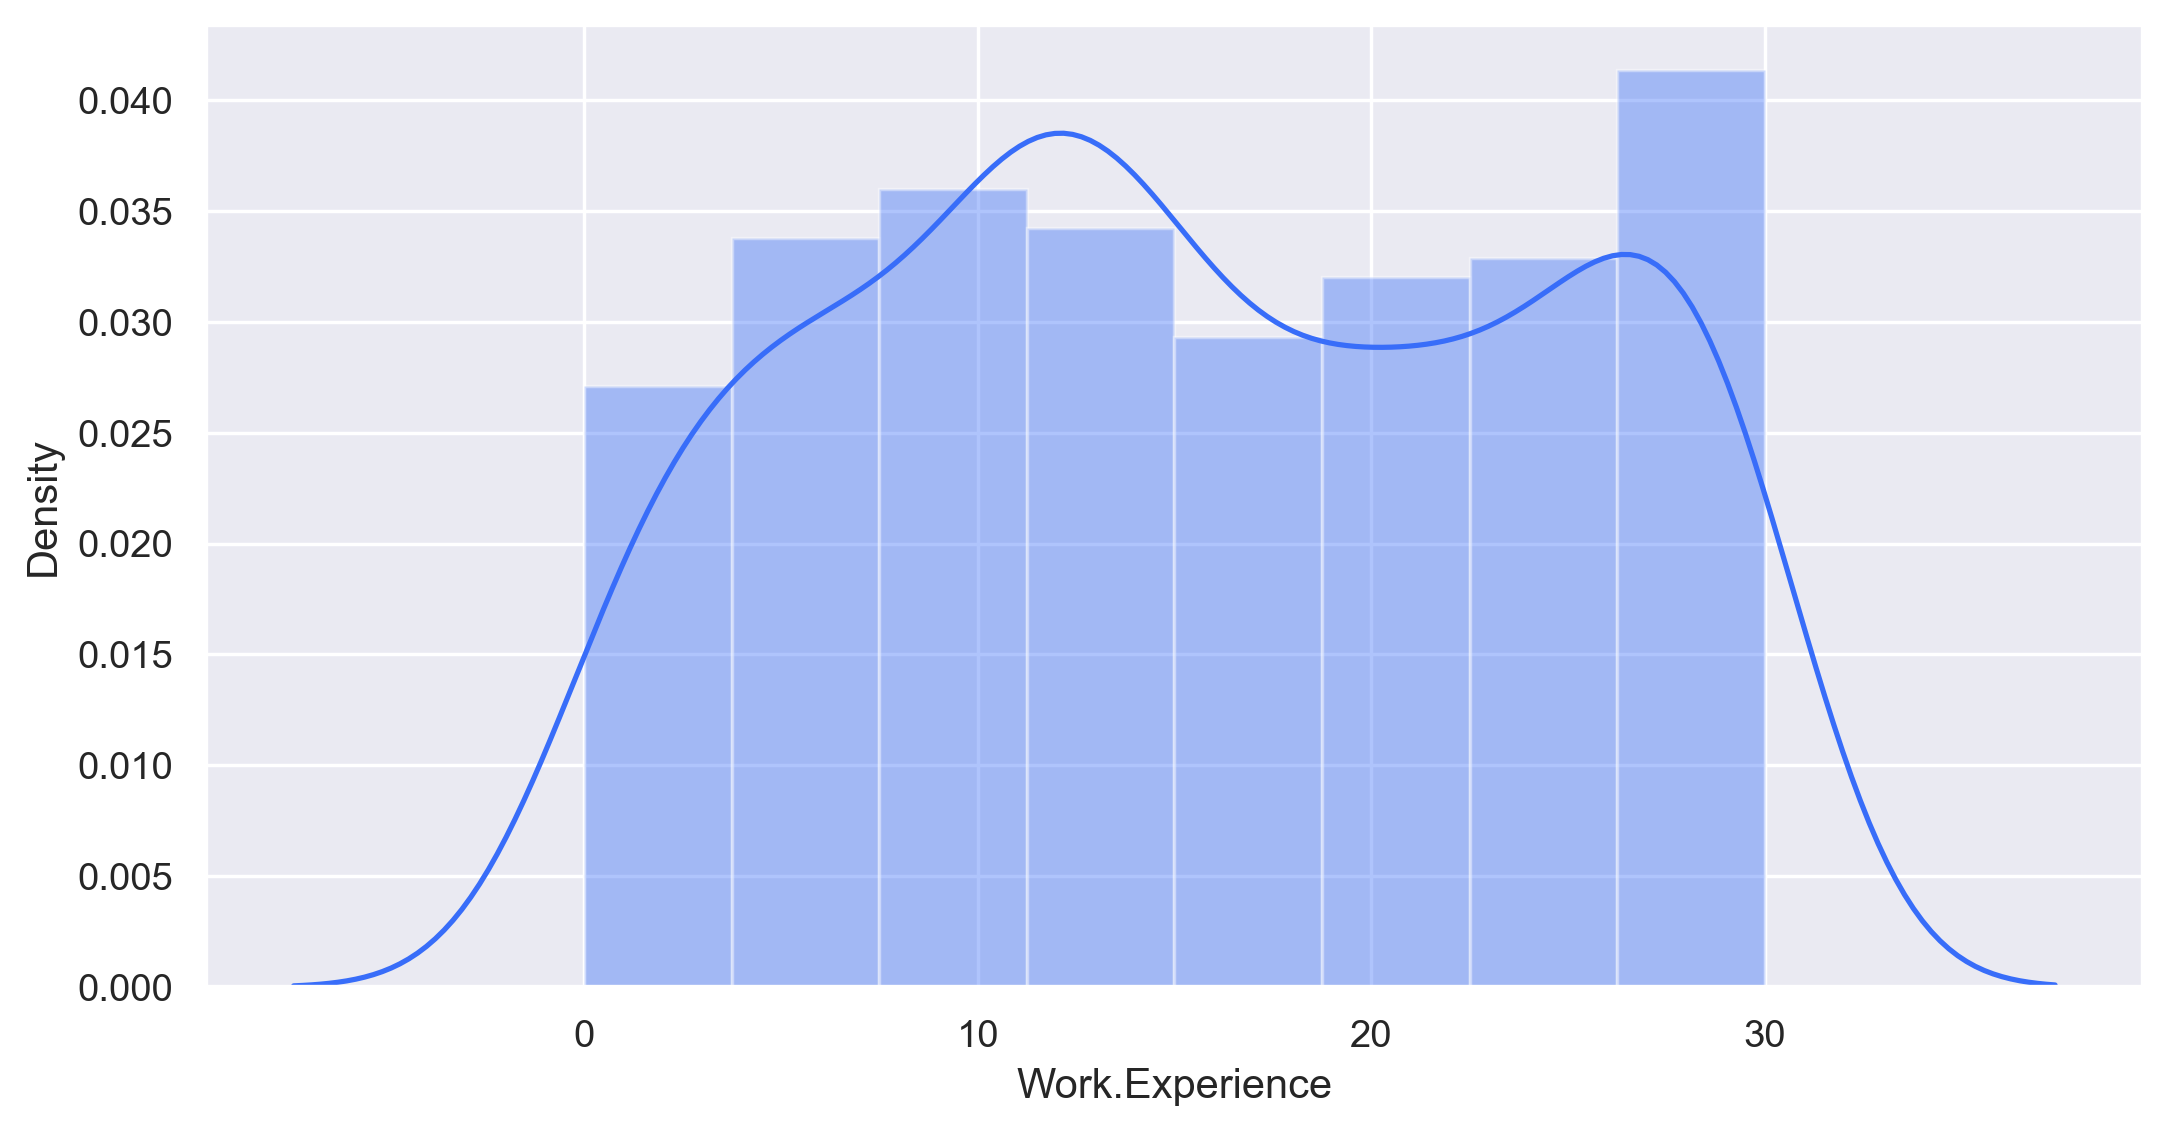

In [41]:
column = ['Taxable.Income','City.Population','Work.Experience']
for col in column:
    sns.distplot(df[col])
    plt.show()

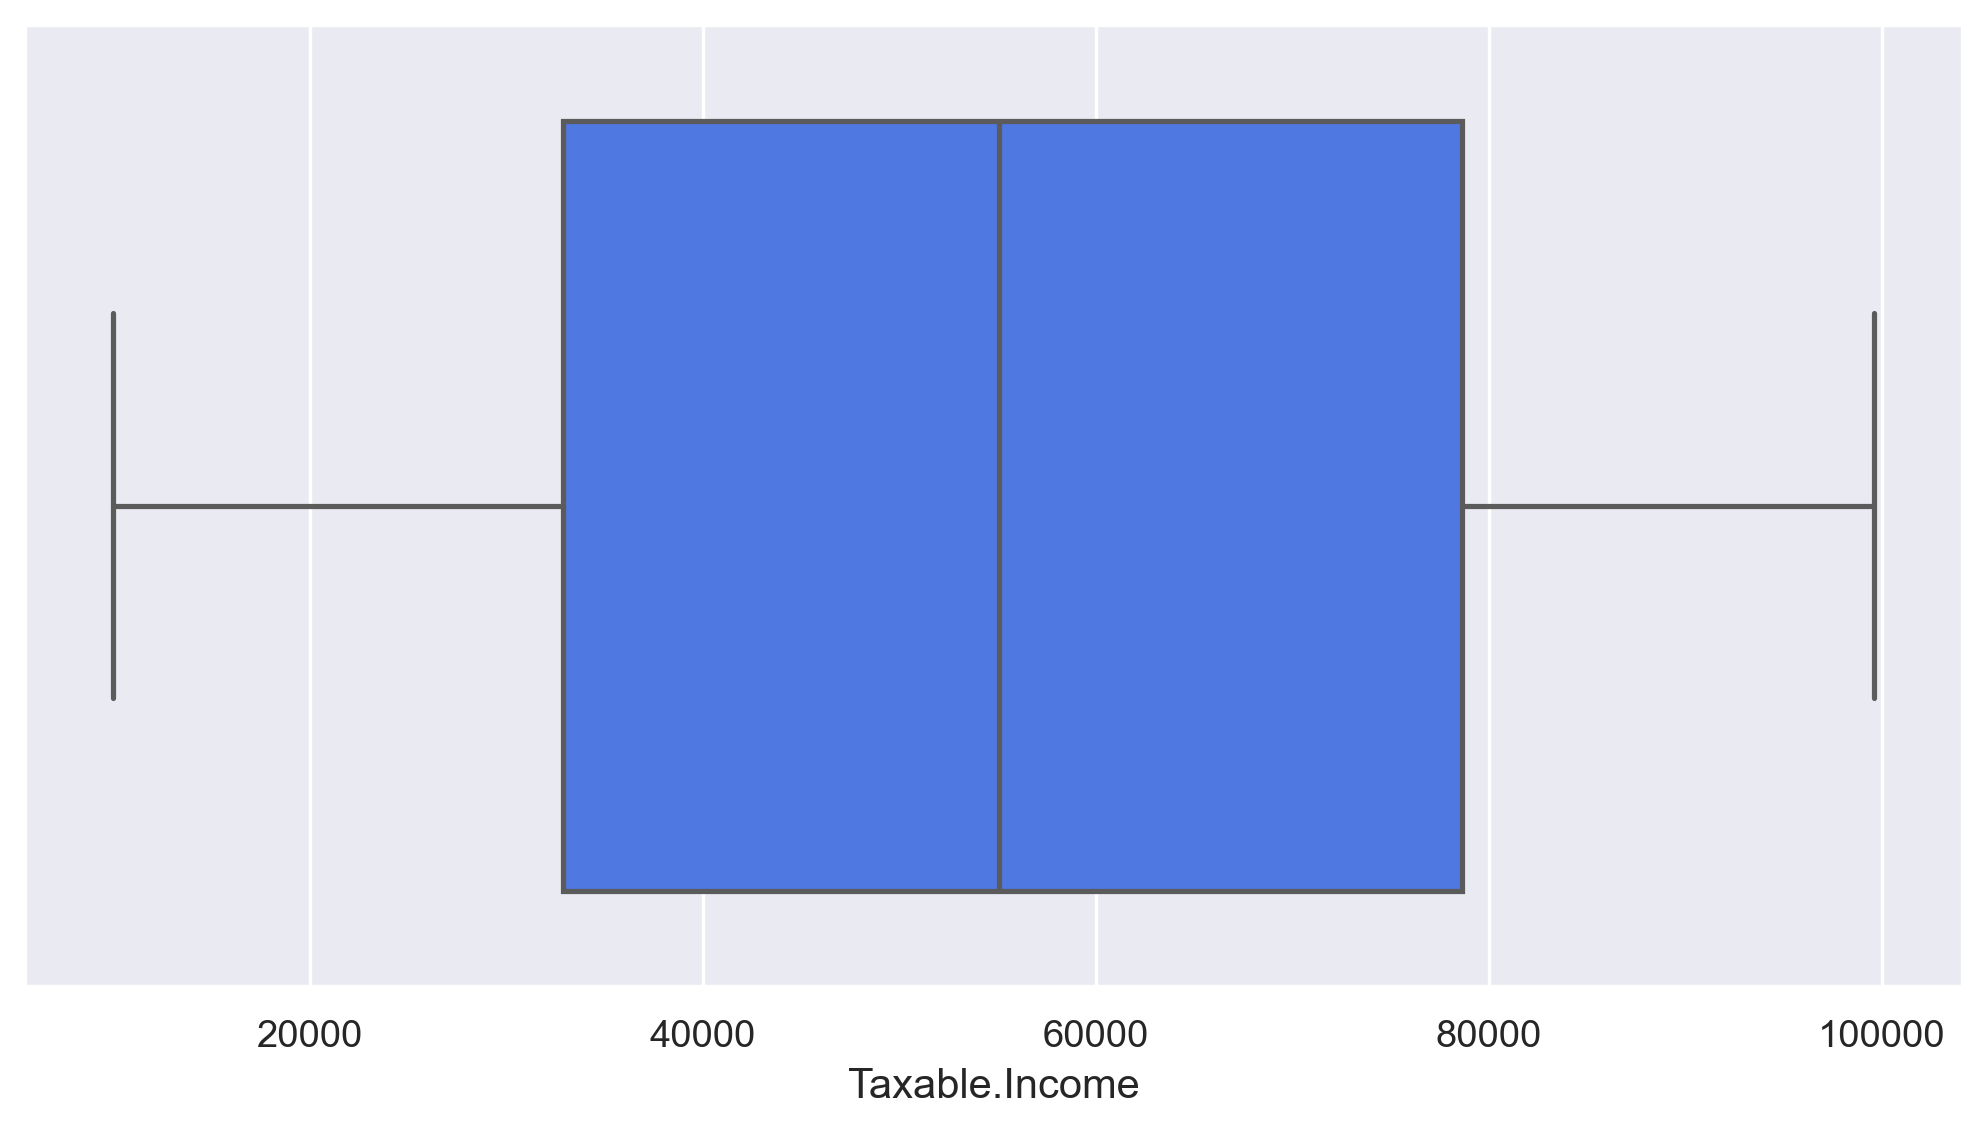

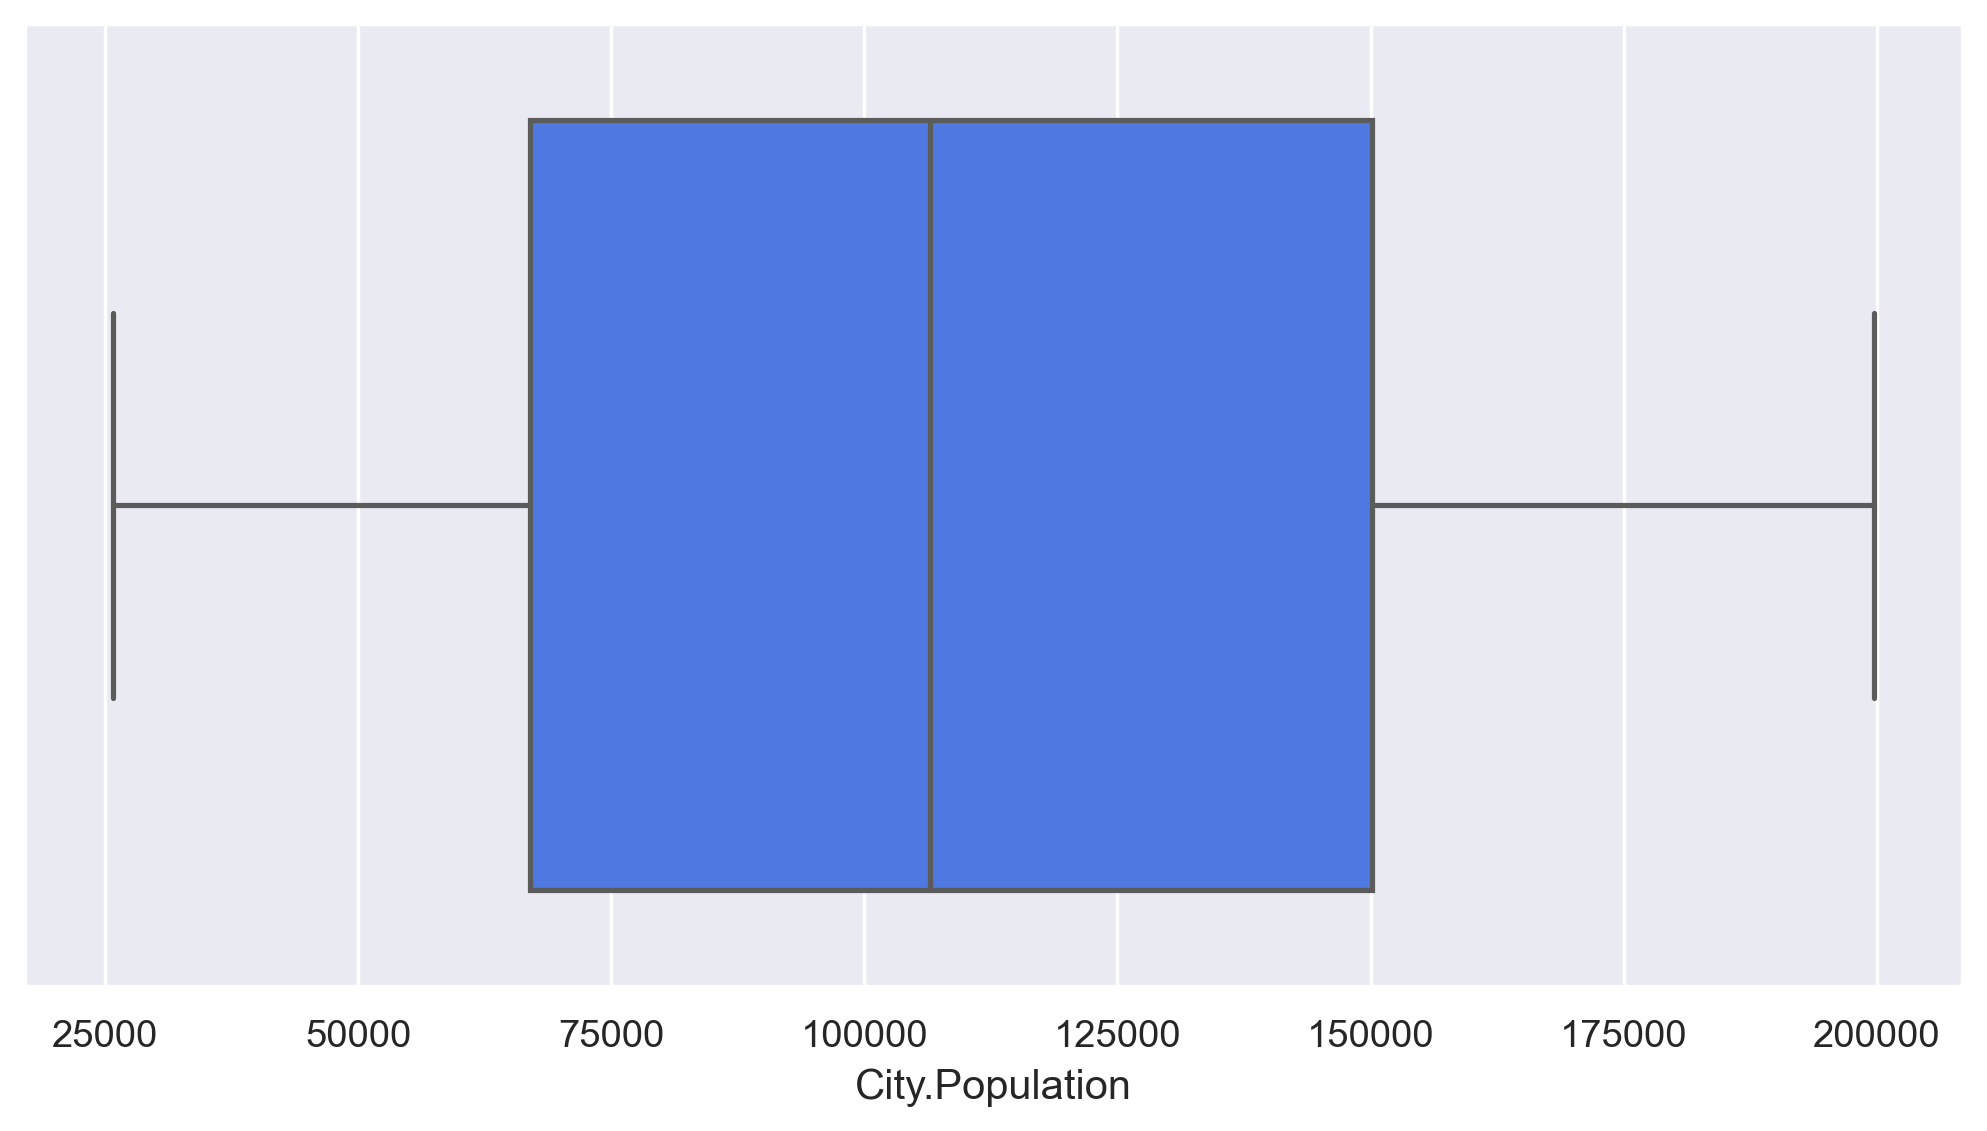

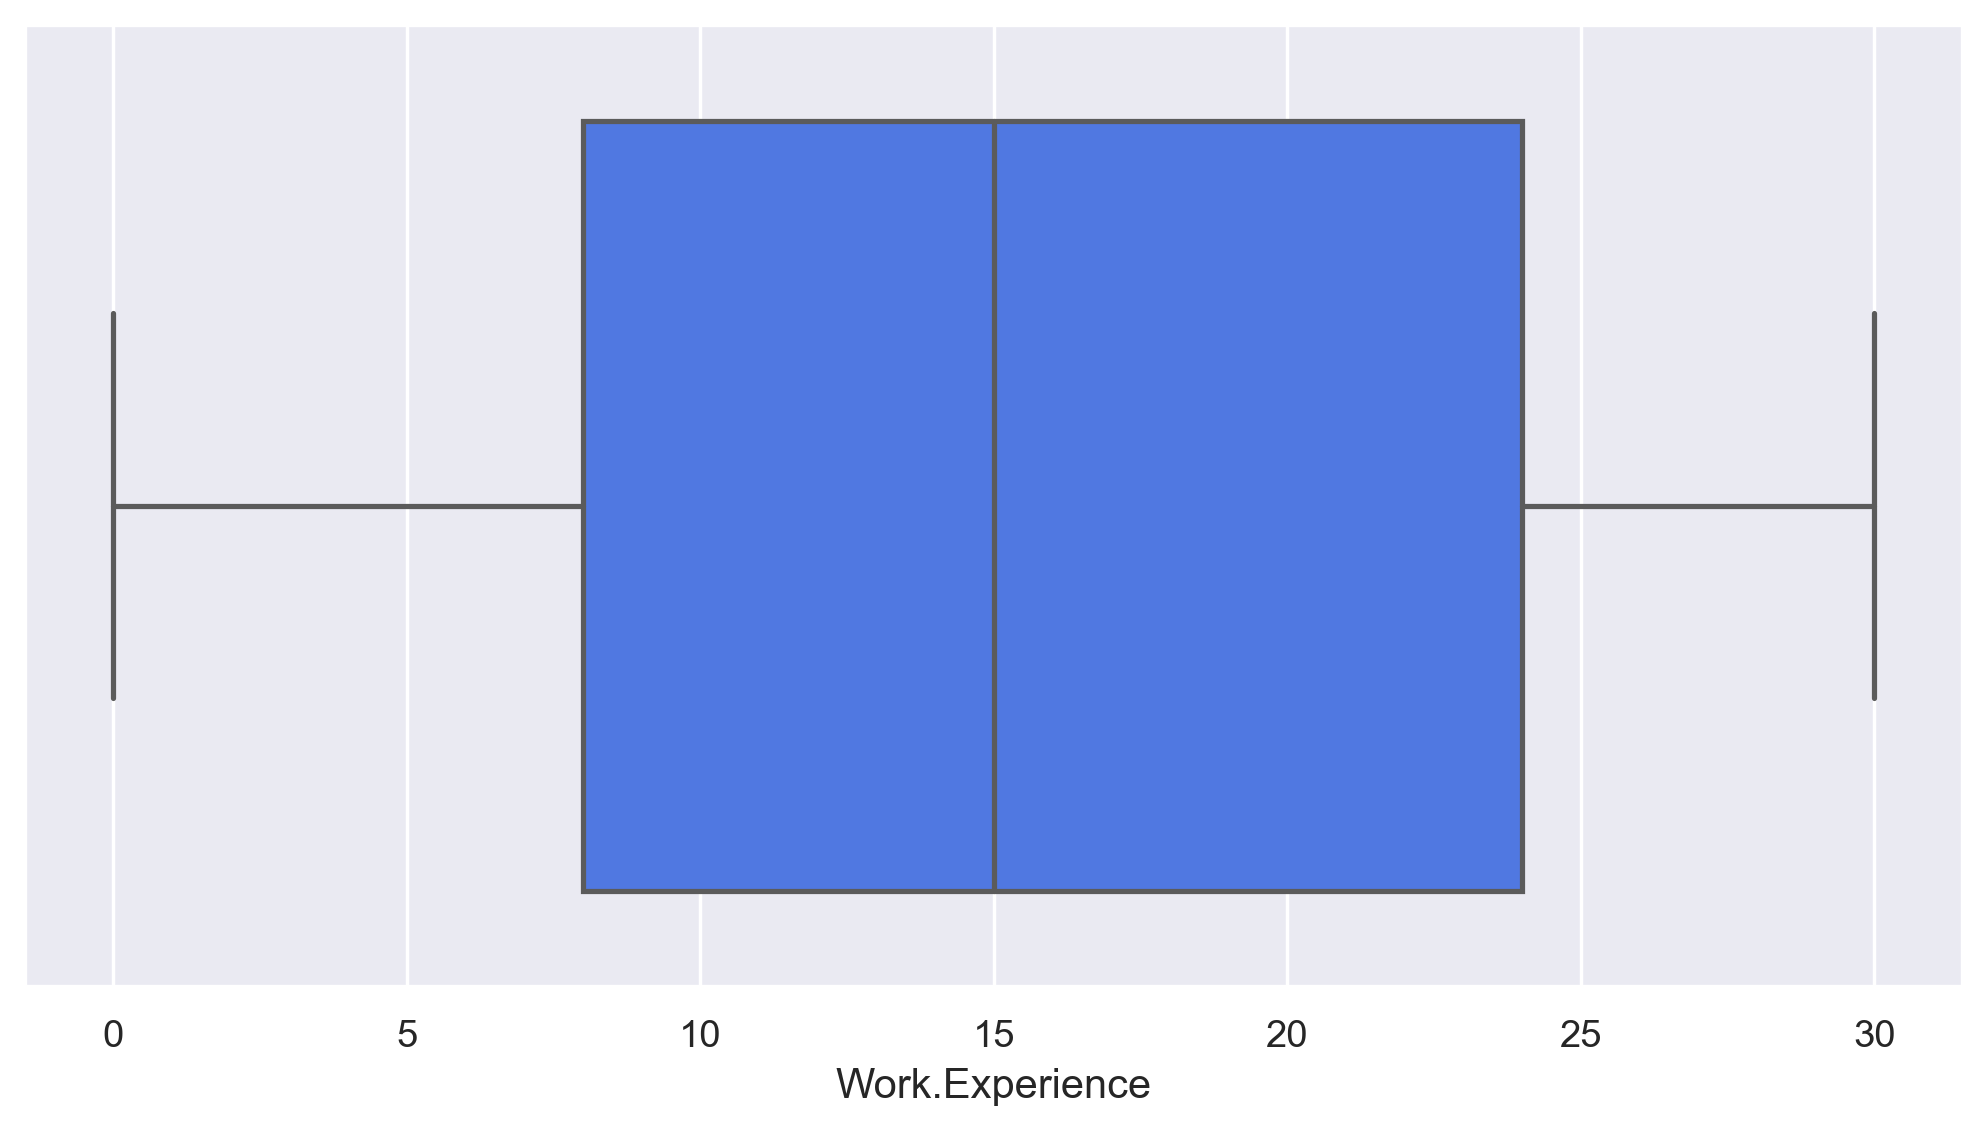

In [42]:
column = ['Taxable.Income','City.Population','Work.Experience']
for col in column:
    sns.boxplot(df[col])
    plt.show()

From the above boxplot graph we can see the data doesn't have outlier

In [43]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Add the new column fraud

Adding new column fraud if the income <=30000 then it is risky otherwise they are Good

In [44]:
#Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

df['Fraud'] ='>=30000'
df.loc[df['Taxable.Income'] >=30000, 'Fraud'] = 'Good'
df.loc[df['Taxable.Income'] <=30000, 'Fraud'] = 'Risky'

Encoding all the categorical values

In [45]:
#Using get dummies

df = pd.get_dummies(df, columns=['Undergrad','Marital.Status','Urban','Fraud'], drop_first=True)

In [46]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Fraud_Risky
0,68833,50047,10,0,0,1,1,0
1,33700,134075,18,1,0,0,1,0
2,36925,160205,30,0,1,0,1,0
3,50190,193264,15,1,0,1,1,0
4,81002,27533,28,0,1,0,0,0
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,0
596,69967,55369,2,1,0,0,1,0
597,47334,154058,0,0,0,0,1,0
598,98592,180083,17,1,1,0,0,0


In [47]:
#Separate feature and target column

x = df.drop(['Fraud_Risky','Taxable.Income'], axis=1)
y = df['Fraud_Risky']

For any tree based algorithm there is no need of feature scaling, hence we are not doing scaling(Bringing down all the column into same scale)

In [48]:
#Splitting data into training and testing data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)
xtrain,ytrain

(     City.Population  Work.Experience  Undergrad_YES  Marital.Status_Married  \
 145           197422                2              0                       0   
 9             155482                4              1                       0   
 375           130935                2              0                       1   
 523            42198               12              0                       0   
 188           137569               10              0                       0   
 ..               ...              ...            ...                     ...   
 71            105680               22              0                       0   
 106            58535               20              1                       0   
 270           130680                5              0                       1   
 435           111774                4              0                       0   
 102            91488               23              1                       0   
 
      Marital.Status_Singl

# Model building

In [49]:
#Building model using RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

In [50]:
#calculate accuarcy 
accuracy=accuracy_score(ytest,ypred)
print(f"Accuracy", accuracy)
print(classification_report(ytest,ypred))

Accuracy 0.725
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        94
           1       0.00      0.00      0.00        26

    accuracy                           0.73       120
   macro avg       0.38      0.46      0.42       120
weighted avg       0.60      0.72      0.66       120



The above model shows 77% accuracy

In [51]:
#checking accuracy, MSE and RMSE values of the model

print(f"MSE {mean_squared_error(ytest,ypred)}")
print(f"RMSE {np.sqrt(mean_squared_error(ytest,ypred))}")

MSE 0.275
RMSE 0.5244044240850758


# Plot tree estimator

[Text(0.5, 0.875, 'City.Population <= 58380.0\ngini = 0.315\nsamples = 300\nvalue = [386, 94]'),
 Text(0.25, 0.625, 'City.Population <= 40128.5\ngini = 0.209\nsamples = 62\nvalue = [82, 11]'),
 Text(0.125, 0.375, 'Undergrad_YES <= 0.5\ngini = 0.292\nsamples = 30\nvalue = [37, 8]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Work.Experience <= 18.0\ngini = 0.117\nsamples = 32\nvalue = [45, 3]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'City.Population <= 64658.5\ngini = 0.337\nsamples = 238\nvalue = [304, 83]'),
 Text(0.625, 0.375, 'City.Population <= 63983.0\ngini = 0.48\nsamples = 9\nvalue = [6, 9]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Urban_YES <= 0.5\ngini = 0.319\nsamples = 229\nvalue = [298, 74]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

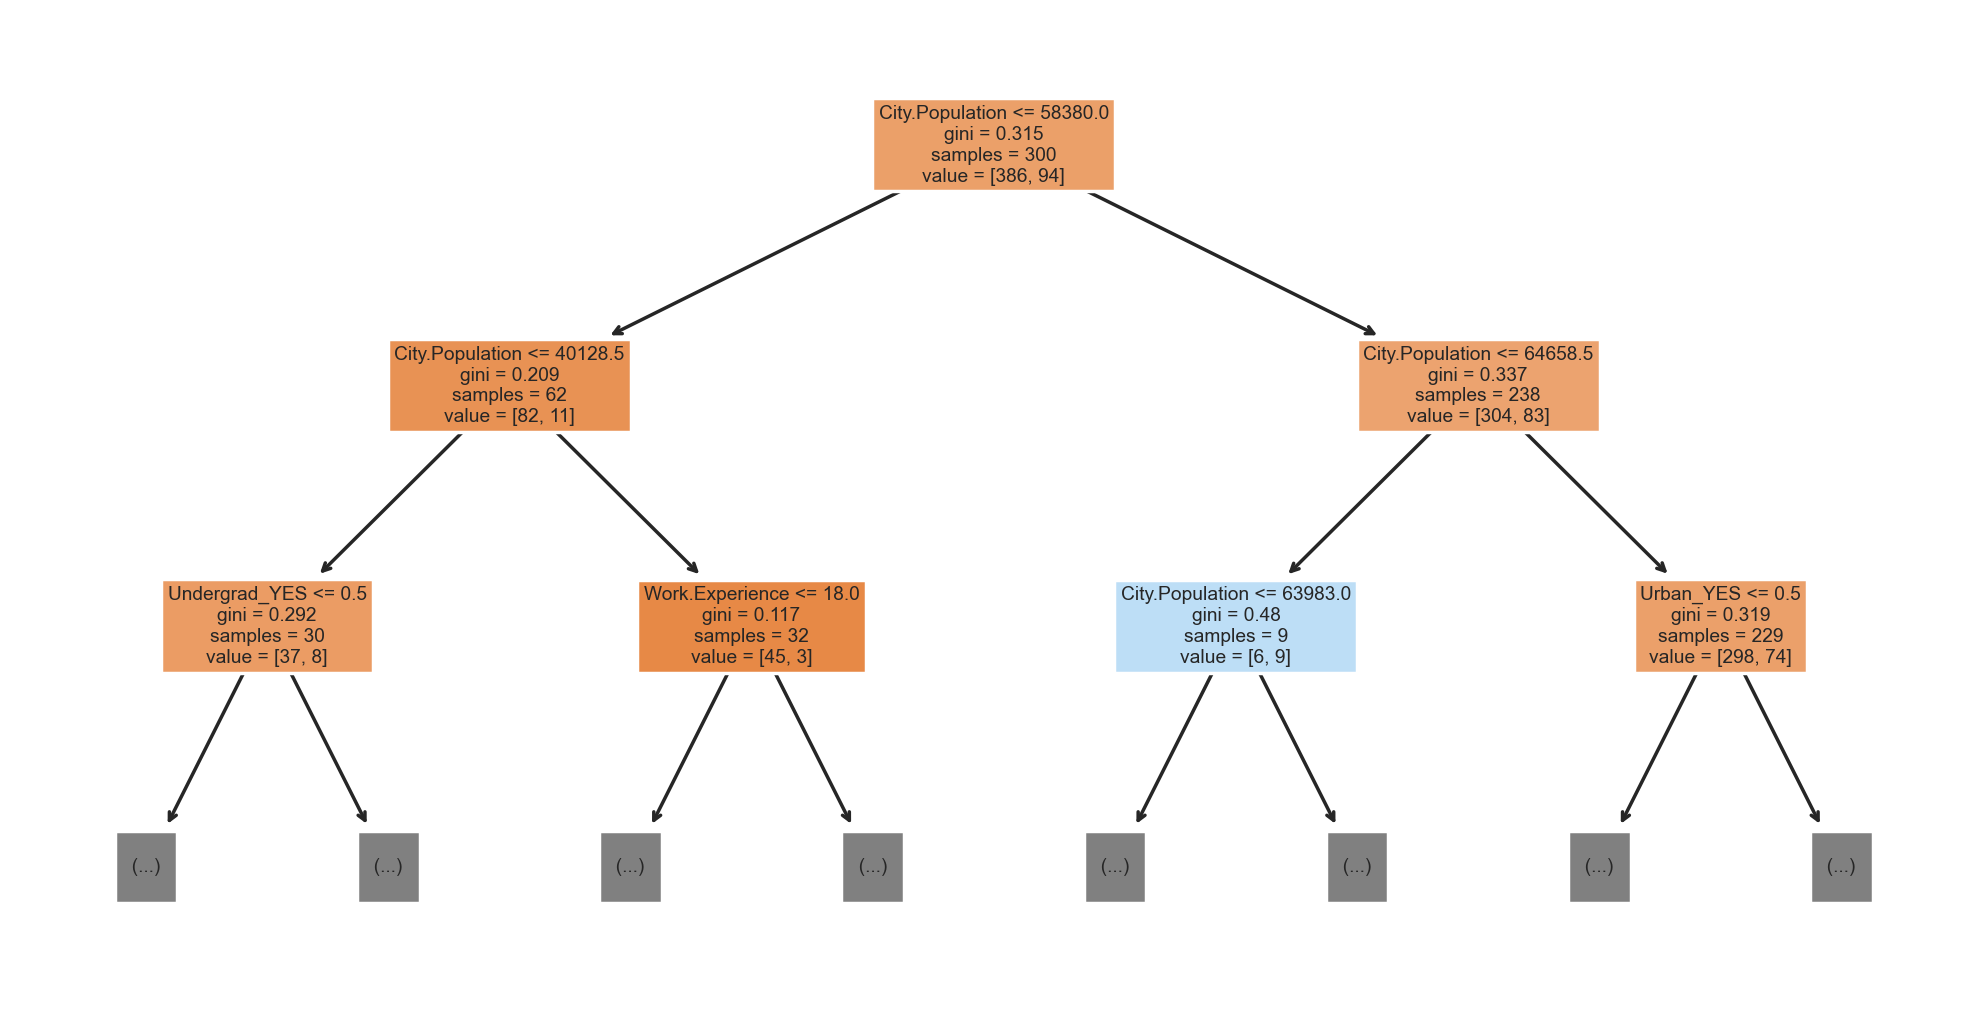

In [52]:
#visualize rf

tree.plot_tree(model.estimators_[0], feature_names=x.columns, filled=True, max_depth=2)

# KFold validation method

In [55]:
kf = KFold(n_splits=10)
kf_score = cross_val_score(RandomForestClassifier(),x,y,cv=kf)

In [56]:
kf_score

array([0.76666667, 0.71666667, 0.66666667, 0.63333333, 0.75      ,
       0.63333333, 0.85      , 0.68333333, 0.71666667, 0.85      ])

In [58]:
kf_score.mean()

0.7266666666666666

By using KFold instead of train_test_split, we have got the accuracy 72%

In [ ]:
# Model building using 'Gini' criterion

In [59]:
model = RandomForestClassifier(criterion='gini')
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

In [60]:
#calculate accuarcy 
accuracy=accuracy_score(ytest,ypred)
print(f"Accuracy", accuracy)
print(classification_report(ytest,ypred))

Accuracy 0.75
              precision    recall  f1-score   support

           0       0.78      0.96      0.86        94
           1       0.00      0.00      0.00        26

    accuracy                           0.75       120
   macro avg       0.39      0.48      0.43       120
weighted avg       0.61      0.75      0.67       120



# Model building using 'entropy' criterion

In [61]:
model = RandomForestClassifier(criterion='entropy')
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

In [62]:
#calculate accuarcy 
accuracy=accuracy_score(ytest,ypred)
print(f"Accuracy", accuracy)
print(classification_report(ytest,ypred))

Accuracy 0.775
              precision    recall  f1-score   support

           0       0.78      0.99      0.87        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120



# Ensemble methods:
    1.Bagging - Random forest
    2.Boosting
    3.Stacking

# 1.Bagging

In [65]:
#bagging with decision tree
bg_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators=30)
bg_dt.fit(xtrain,ytrain)
print(f"Train: {bg_dt.score(xtrain,ytrain)}\nTest: {bg_dt.score(xtest,ytest)}")

Train: 0.9979166666666667
Test: 0.7666666666666667


In [66]:
#Bagging with LogisticRegression
bg_dt = BaggingClassifier(LogisticRegression(), n_estimators=30)
bg_dt.fit(xtrain,ytrain)
print(f"Train: {bg_dt.score(xtrain,ytrain)}\nTest: {bg_dt.score(xtest,ytest)}")

Train: 0.7958333333333333
Test: 0.7833333333333333


# Tuning bagging classifier

In [68]:
params = {'n_estimators': [10,20,30,40,50,60,70,80,90]}
grid = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()),  param_grid= params, verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90]},
             verbose=1)

In [69]:
grid.best_params_

{'n_estimators': 80}

In [70]:
#bagging with decision tree
bg_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators=80)
bg_dt.fit(xtrain,ytrain)
print(f"Train: {bg_dt.score(xtrain,ytrain)}\nTest: {bg_dt.score(xtest,ytest)}")

Train: 1.0
Test: 0.7416666666666667


# 2.Boosting

In [71]:
def prediction(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(f"Test Accuracy: {model.score(xtest,ytest)}")
    print(classification_report(ytest,ypred))

In [73]:
prediction(DecisionTreeClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        94
           1       0.21      0.19      0.20        26

    accuracy                           0.67       120
   macro avg       0.49      0.50      0.49       120
weighted avg       0.66      0.67      0.66       120



In [74]:
prediction(AdaBoostClassifier())

Train Accuracy: 0.80625
Test Accuracy: 0.775
              precision    recall  f1-score   support

           0       0.78      0.99      0.87        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120



In [75]:
prediction(GradientBoostingClassifier())

Train Accuracy: 0.8770833333333333
Test Accuracy: 0.7583333333333333
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        94
           1       0.00      0.00      0.00        26

    accuracy                           0.76       120
   macro avg       0.39      0.48      0.43       120
weighted avg       0.61      0.76      0.68       120



In [82]:
prediction(XGBClassifier())

Train Accuracy: 0.9979166666666667
Test Accuracy: 0.6916666666666667
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        94
           1       0.00      0.00      0.00        26

    accuracy                           0.69       120
   macro avg       0.38      0.44      0.41       120
weighted avg       0.60      0.69      0.64       120



# Tuning gradient boosting 

In [77]:
params = {
    'n_estimators' : [80,90,100,110,130,150],
    'learning_rate' : [0.5,0.6,0.7,0.9,1],
    'max_depth' : [3,5,7,11]
}

In [78]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=params, verbose=1)

grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.5, 0.6, 0.7, 0.9, 1],
                         'max_depth': [3, 5, 7, 11],
                         'n_estimators': [80, 90, 100, 110, 130, 150]},
             verbose=1)

In [79]:
grid.best_params_

{'learning_rate': 0.9, 'max_depth': 11, 'n_estimators': 100}

In [80]:
prediction(GradientBoostingClassifier(n_estimators=100, learning_rate=0.9, max_depth=11))

Train Accuracy: 1.0
Test Accuracy: 0.725
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        94
           1       0.23      0.12      0.15        26

    accuracy                           0.73       120
   macro avg       0.51      0.50      0.49       120
weighted avg       0.66      0.72      0.69       120



# 3.Stacking

In [86]:
models = []

models.append(('lg',LogisticRegression()))
models.append(('knn', KNeighborsClassifier()))
models.append(('dt',DecisionTreeClassifier()))
models.append(('dt1', DecisionTreeClassifier(criterion='entropy')))
models.append(('svc',SVC()))

In [87]:
prediction(StackingClassifier(estimators=models, final_estimator=RandomForestClassifier(max_depth=3)))

Train Accuracy: 0.7958333333333333
Test Accuracy: 0.7833333333333333
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



The stacking method is having accuracy of 78%